In [ ]:
from throw_separator import split_and_save_throws
import os

splitting_input_path = "data/20240430"
splitting_output_path = "data/20240430_splitted"

# data hasn't been split before
if not os.path.isdir(splitting_output_path) or not os.listdir(splitting_output_path):
    split_and_save_throws(splitting_input_path, splitting_output_path)
    # correct the one outlier
    os.remove(os.path.join(splitting_output_path, "Kevin", "LW-2_20240430_181958_312_8.csv"))

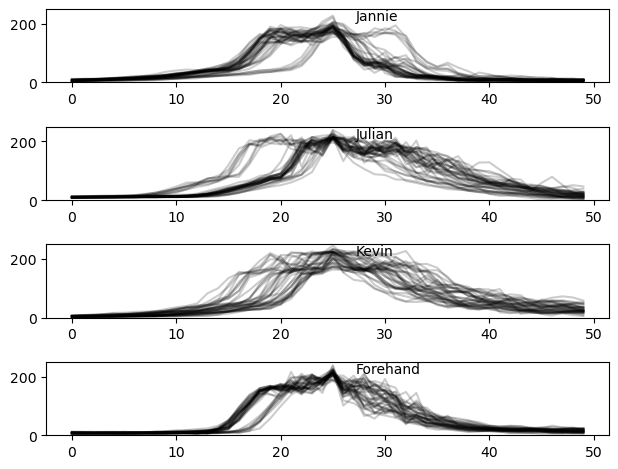

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans

clustering_input_path = splitting_output_path
seed = 42
backhand_throws = []
forehand_throws = []

plt.figure()

def load_throws(directory):
    throws = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            values = df["Acc_Vector"].values
            throws.append(values)
    return throws

for i, name in enumerate(['Jannie', 'Julian', 'Kevin', 'Forehand']):
    plt.subplot(4, 1, i+1)
    plt.tight_layout()
    directory = os.path.join(clustering_input_path, name)

    throws = load_throws(directory)
    if name != 'Forehand':
        backhand_throws += throws
    else:
        forehand_throws = throws

    for throw in throws:
        plt.plot(throw, "k", alpha=.2)
    plt.text(0.55, 0.85, name, transform=plt.gca().transAxes)
    plt.ylim(0, 250)


In [24]:
all_throws = backhand_throws + forehand_throws

for metric in ["euclidean", "dtw", "softdtw"]:
    print(f"K-Means with {metric} metric")
    km = TimeSeriesKMeans(n_clusters=2, verbose=False, random_state=seed, metric=metric)
    y_pred = km.fit_predict(all_throws)
    print("Labels for backhand throws:")
    print(np.array(y_pred).reshape((4, 40))[0:3])
    print("Labels for forhand throws:")
    print(np.array(y_pred).reshape((4, 40))[3])
    print("-----------------------------------------------")
    print()

K-Means with euclidean metric
Labels for backhand throws:
[[0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
  1 1 1 1]
 [1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1
  0 1 1 0]]
Labels for forhand throws:
[0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0]
-----------------------------------------------

K-Means with dtw metric
Labels for backhand throws:
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
  0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0
  1 0 0 0]]
Labels for forhand throws:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1]
-----------------------------------------------

K-Means with softdtw metric
Labels for backhand throws:
[[1 